## Python Crypto Bot (pycryptobot)

In [1]:
MARKET = 'BCH-GBP'

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

plt.rc('xtick', labelsize=15)     
plt.rc('ytick', labelsize=15)
plt.rc('axes', titlesize=16)

sns.set_style('darkgrid')

**Load trading data CSV into a Pandas dataframe**

In [3]:
df = pd.read_csv('./data/' + MARKET + '_3600.csv')

**Display Pandas dataframe**

In [4]:
df

,date,market,granularity,low,high,open,close,volume,close_pc,cma,...,three_white_soldiers,three_black_crows,doji,three_line_strike,two_black_gapping,morning_star,evening_star,abandoned_baby,morning_doji_star,evening_doji_star
0,2021-02-03 03:00:00,BCH-GBP,3600,321.01,324.61,322.50,324.54,31.205738,0.00,324.540000,...,False,False,False,False,False,False,False,False,False,False
1,2021-02-03 04:00:00,BCH-GBP,3600,320.78,325.96,323.84,322.32,106.807731,-0.68,323.430000,...,False,False,False,False,False,False,False,False,False,False
2,2021-02-03 05:00:00,BCH-GBP,3600,319.27,321.84,321.80,320.56,26.656163,-0.55,322.473333,...,False,False,False,False,False,False,False,False,False,False
3,2021-02-03 06:00:00,BCH-GBP,3600,320.85,327.08,320.85,324.29,77.742072,1.16,322.927500,...,False,False,False,False,False,False,False,False,False,False
4,2021-02-03 07:00:00,BCH-GBP,3600,320.34,324.60,323.91,320.74,43.858377,-1.09,322.490000,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,2021-02-15 10:00:00,BCH-GBP,3600,498.65,522.56,500.18,522.44,153.522612,4.15,371.705304,...,False,False,False,False,False,False,False,False,False,False
296,2021-02-15 11:00:00,BCH-GBP,3600,516.94,530.00,520.98,519.83,345.671863,-0.50,372.204040,...,False,False,False,False,False,False,False,False,False,False
297,2021-02-15 12:00:00,BCH-GBP,3600,510.00,526.22,518.17,524.70,261.791471,0.94,372.715772,...,False,False,False,False,False,False,False,False,False,False
298,2021-02-15 13:00:00,BCH-GBP,3600,513.07,525.53,524.78,519.02,134.711196,-1.08,373.205084,...,False,False,False,False,False,False,False,False,False,False


**Display Pandas dataframe column types**

In [5]:
df.dtypes

date                     object
market                   object
granularity               int64
low                     float64
high                    float64
open                    float64
close                   float64
volume                  float64
close_pc                float64
cma                     float64
sma20                   float64
sma50                   float64
sma200                  float64
ema12                   float64
ema26                   float64
goldencross                bool
deathcross                 bool
rsi14                   float64
macd                    float64
signal                  float64
obv                     float64
obv_pc                  float64
ema12gtema26               bool
ema12gtema26co             bool
ema12ltema26               bool
ema12ltema26co             bool
macdgtsignal               bool
macdgtsignalco             bool
macdltsignal               bool
macdltsignalco             bool
hammer                     bool
inverted

**We don't want null values, sum up the nulls per column**

In [6]:
df.isnull().sum()

date                    0
market                  0
granularity             0
low                     0
high                    0
open                    0
close                   0
volume                  0
close_pc                0
cma                     0
sma20                   0
sma50                   0
sma200                  0
ema12                   0
ema26                   0
goldencross             0
deathcross              0
rsi14                   0
macd                    0
signal                  0
obv                     0
obv_pc                  0
ema12gtema26            0
ema12gtema26co          0
ema12ltema26            0
ema12ltema26co          0
macdgtsignal            0
macdgtsignalco          0
macdltsignal            0
macdltsignalco          0
hammer                  0
inverted_hammer         0
shooting_star           0
hanging_man             0
three_white_soldiers    0
three_black_crows       0
doji                    0
three_line_strike       0
two_black_ga

**Fill nulls with a default value if required (which we don't)**

**Drop null values (we don't have any)**

**Convert all bool columns to int**

**Create dummy values if required, one hot encoding (not needed here)**

In [7]:
#df.rsi14.fillna(50, inplace = True)
#df.dropna(inplace = True)

def convert_bool(x):
    if x == True:
        return 1
    elif x == False:
        return 0

group_column_dtypes = df.columns.to_series().groupby(df.dtypes).groups

for k, v in group_column_dtypes.items():
    if k == 'bool':
        for column_name in v:
            df[column_name] = df[column_name].map(convert_bool)
            #df[column_name] = df[column_name].astype(int)

# one hot encoding for objects
#df = pd.get_dummies(df,columns= ['market'])

**Display Pandas dataframe**

In [8]:
df.dtypes

date                     object
market                   object
granularity               int64
low                     float64
high                    float64
open                    float64
close                   float64
volume                  float64
close_pc                float64
cma                     float64
sma20                   float64
sma50                   float64
sma200                  float64
ema12                   float64
ema26                   float64
goldencross               int64
deathcross                int64
rsi14                   float64
macd                    float64
signal                  float64
obv                     float64
obv_pc                  float64
ema12gtema26              int64
ema12gtema26co            int64
ema12ltema26              int64
ema12ltema26co            int64
macdgtsignal              int64
macdgtsignalco            int64
macdltsignal              int64
macdltsignalco            int64
hammer                    int64
inverted

**Save processed dataframe***

In [9]:
df.to_csv('./data/' + MARKET + '_3600_processed.csv')
df_processed = pd.read_csv('./data/' + MARKET + '_3600_processed.csv')

**Inspect processed dataset**

In [10]:
df.head()

,date,market,granularity,low,high,open,close,volume,close_pc,cma,...,three_white_soldiers,three_black_crows,doji,three_line_strike,two_black_gapping,morning_star,evening_star,abandoned_baby,morning_doji_star,evening_doji_star
0,2021-02-03 03:00:00,BCH-GBP,3600,321.01,324.61,322.50,324.54,31.205738,0.00,324.540000,...,0,0,0,0,0,0,0,0,0,0
1,2021-02-03 04:00:00,BCH-GBP,3600,320.78,325.96,323.84,322.32,106.807731,-0.68,323.430000,...,0,0,0,0,0,0,0,0,0,0
2,2021-02-03 05:00:00,BCH-GBP,3600,319.27,321.84,321.80,320.56,26.656163,-0.55,322.473333,...,0,0,0,0,0,0,0,0,0,0
3,2021-02-03 06:00:00,BCH-GBP,3600,320.85,327.08,320.85,324.29,77.742072,1.16,322.927500,...,0,0,0,0,0,0,0,0,0,0
4,2021-02-03 07:00:00,BCH-GBP,3600,320.34,324.60,323.91,320.74,43.858377,-1.09,322.490000,...,0,0,0,0,0,0,0,0,0,0


#### Feature Engineering

Example:

df['NewColumn'] = df['ExistingColumn'].map(lambda x: x = 'do something')

**Additional Examples**

In [11]:
df["goldencross"].value_counts()

1    219
0     81
Name: goldencross, dtype: int64

In [12]:
df.groupby("goldencross").agg({"close_pc" : 'count', "close" : "mean"}).sort_values(by = "goldencross")

,close_pc,close
goldencross,,
0,81,322.742963
1,219,392.534429


In [13]:
df.groupby("goldencross").agg({"close_pc" : 'count', "close" : "mean"}).sort_index()

,close_pc,close
goldencross,,
0,81,322.742963
1,219,392.534429


<AxesSubplot:xlabel='goldencross'>

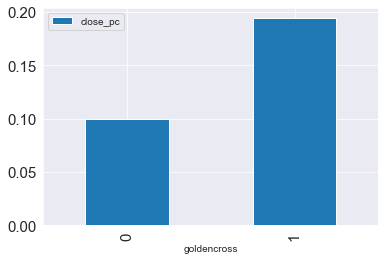

In [14]:
df.groupby('goldencross').agg({"close_pc" : "mean"}).plot(kind = 'bar')

<AxesSubplot:>

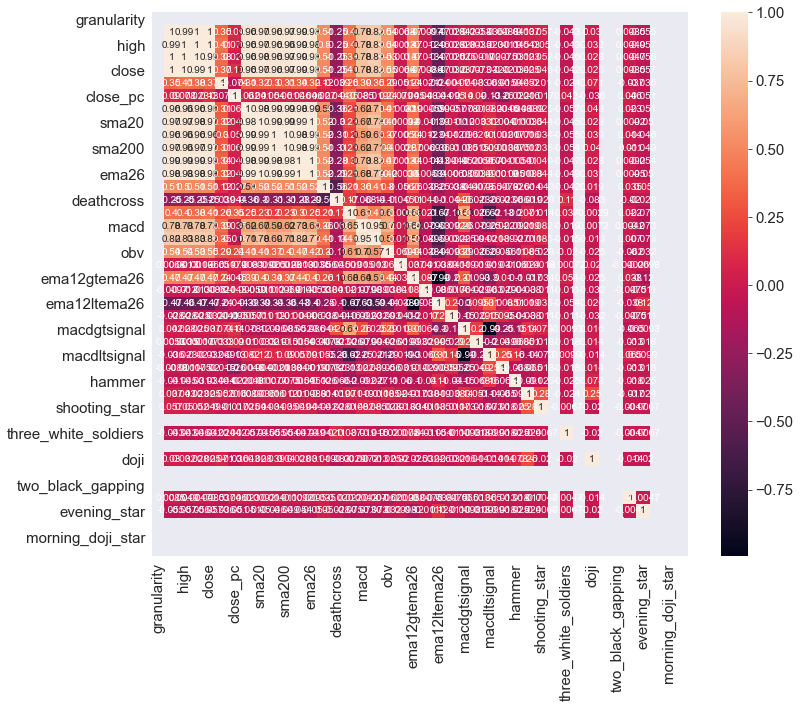

In [15]:
plt.figure(figsize = (12,10))
sns.heatmap(df.loc[:, [i for i in df.columns if "market" not in i]].corr(), annot=True)

<AxesSubplot:>

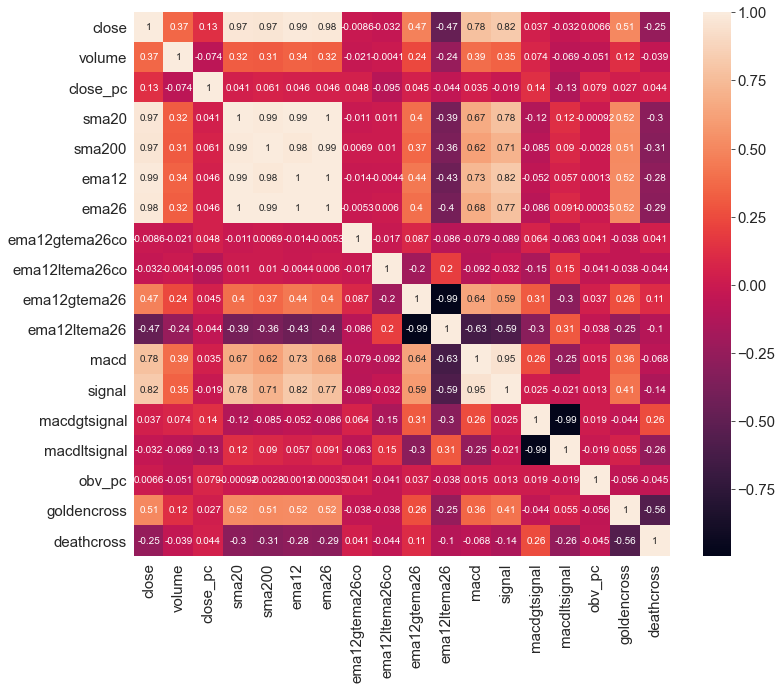

In [16]:
plt.figure(figsize = (12,10))
sns.heatmap(df.loc[:, [
    'close','volume','close_pc',
    'sma20','sma200',
    'ema12','ema26','ema12gtema26co','ema12ltema26co','ema12gtema26','ema12ltema26',
    'macd','signal','macdgtsignal','macdltsignal',
    'obv_pc',
    'goldencross','deathcross']].corr(), annot=True)

<AxesSubplot:xlabel='ema12', ylabel='close'>

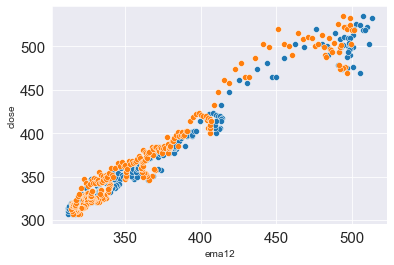

In [17]:
sns.scatterplot(data=df, x="ema12", y="close")
sns.scatterplot(data=df, x="ema26", y="close")

<AxesSubplot:>

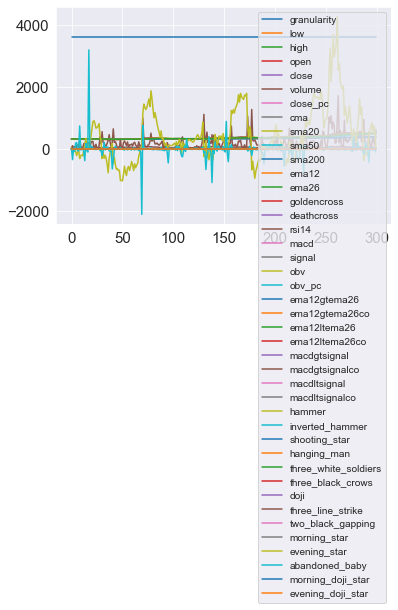

In [18]:
df.plot()

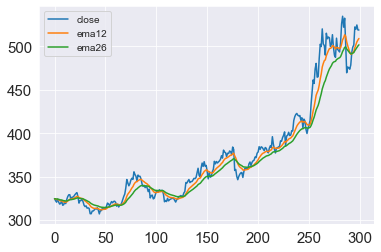

In [19]:
df[['close','ema12','ema26']].plot()
plt.show()

#### Splitting the Data into Train and Test sets

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [21]:
df.columns

Index(['date', 'market', 'granularity', 'low', 'high', 'open', 'close',
       'volume', 'close_pc', 'cma', 'sma20', 'sma50', 'sma200', 'ema12',
       'ema26', 'goldencross', 'deathcross', 'rsi14', 'macd', 'signal', 'obv',
       'obv_pc', 'ema12gtema26', 'ema12gtema26co', 'ema12ltema26',
       'ema12ltema26co', 'macdgtsignal', 'macdgtsignalco', 'macdltsignal',
       'macdltsignalco', 'hammer', 'inverted_hammer', 'shooting_star',
       'hanging_man', 'three_white_soldiers', 'three_black_crows', 'doji',
       'three_line_strike', 'two_black_gapping', 'morning_star',
       'evening_star', 'abandoned_baby', 'morning_doji_star',
       'evening_doji_star'],
      dtype='object')

# Seasonal ARIMA Model

In [22]:
from datetime import datetime

def parser(x):
    return datetime.strptime(x, '%Y-%m-%d %H:%M:%S')

ts = pd.read_csv('./data/' + MARKET + '_3600_processed.csv', header=0, parse_dates=[1], index_col=1, squeeze=True, date_parser=parser)
ts = ts.drop("Unnamed: 0", axis=1)
ts = ts[['close']]
ts

,close
date,
2021-02-03 03:00:00,324.54
2021-02-03 04:00:00,322.32
2021-02-03 05:00:00,320.56
2021-02-03 06:00:00,324.29
2021-02-03 07:00:00,320.74
...,...
2021-02-15 10:00:00,522.44
2021-02-15 11:00:00,519.83
2021-02-15 12:00:00,524.70


/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'


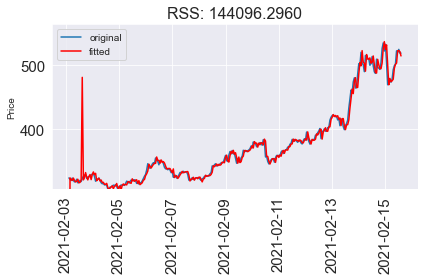

In [23]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(ts['close'], trend='n', order=(0,1,0), seasonal_order=(1,1,1,12))
results_ARIMA = model.fit(disp=-1)
fitted_values = results_ARIMA.fittedvalues

plt.plot(ts['close'], label='original')
plt.plot(fitted_values, color='red', label='fitted')
plt.ylim(bottom=np.amin(ts['close']))
plt.title('RSS: %.4f' % sum((fitted_values-ts['close'])**2))
plt.legend()
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.tight_layout()

In [24]:
from datetime import datetime, timedelta

start_date = ts.last_valid_index()
end_date = start_date + timedelta(days=1)
print (start_date, end_date)

pred = results_ARIMA.predict(start=str(start_date), end=str(end_date), dynamic=True)
pred

#plt.plot(pred, label='prediction')
#plt.ylabel('Price')
#plt.xlabel('Days')
#plt.xticks(rotation=90)
#plt.tight_layout()

2021-02-15 14:00:00 2021-02-16 14:00:00


2021-02-15 14:00:00    514.520780
2021-02-15 15:00:00    515.422778
2021-02-15 16:00:00    516.938414
2021-02-15 17:00:00    516.434342
2021-02-15 18:00:00    519.095049
2021-02-15 19:00:00    520.716379
2021-02-15 20:00:00    522.833322
2021-02-15 21:00:00    523.790928
2021-02-15 22:00:00    527.446719
2021-02-15 23:00:00    528.082223
2021-02-16 00:00:00    530.796901
2021-02-16 01:00:00    528.694620
2021-02-16 02:00:00    526.022601
2021-02-16 03:00:00    526.561195
2021-02-16 04:00:00    528.224120
2021-02-16 05:00:00    527.799589
2021-02-16 06:00:00    530.321009
2021-02-16 07:00:00    531.125430
2021-02-16 08:00:00    532.985682
2021-02-16 09:00:00    533.853836
2021-02-16 10:00:00    536.423836
2021-02-16 11:00:00    537.264887
2021-02-16 12:00:00    539.843063
2021-02-16 13:00:00    537.967369
2021-02-16 14:00:00    535.411072
Freq: H, Name: predicted_mean, dtype: float64

# Logistic Regression

In [25]:
df = pd.read_csv('./data/' + MARKET + '_3600_processed.csv')
df = df.drop("Unnamed: 0", axis=1)
df.head(5)

,date,market,granularity,low,high,open,close,volume,close_pc,cma,...,three_white_soldiers,three_black_crows,doji,three_line_strike,two_black_gapping,morning_star,evening_star,abandoned_baby,morning_doji_star,evening_doji_star
0,2021-02-03 03:00:00,BCH-GBP,3600,321.01,324.61,322.50,324.54,31.205738,0.00,324.540000,...,0,0,0,0,0,0,0,0,0,0
1,2021-02-03 04:00:00,BCH-GBP,3600,320.78,325.96,323.84,322.32,106.807731,-0.68,323.430000,...,0,0,0,0,0,0,0,0,0,0
2,2021-02-03 05:00:00,BCH-GBP,3600,319.27,321.84,321.80,320.56,26.656163,-0.55,322.473333,...,0,0,0,0,0,0,0,0,0,0
3,2021-02-03 06:00:00,BCH-GBP,3600,320.85,327.08,320.85,324.29,77.742072,1.16,322.927500,...,0,0,0,0,0,0,0,0,0,0
4,2021-02-03 07:00:00,BCH-GBP,3600,320.34,324.60,323.91,320.74,43.858377,-1.09,322.490000,...,0,0,0,0,0,0,0,0,0,0


In [26]:
# Split into train and test sets

y = df['goldencross'] # must be a classification like a 1 or 0
X = df.loc[:, ['close']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle=False)
df.shape, train.shape, test.shape

NameError: name 'train' is not defined

In [ ]:
logreg = LogisticRegression()

In [ ]:
type(logreg)

In [ ]:
logreg.fit(X_train, y_train)

In [ ]:
logreg.score(X_train, y_train), logreg.score(X_test, y_test)

In [ ]:
y_hat = logreg.predict(X_test)

X_test_display = X_test.copy()
X_test_display['goldencross_predicted'] = y_hat
X_test_display['goldencross_actual'] = y_test

X_test_display.head()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
confusion_matrix(y_test, y_hat)

In [ ]:
print(classification_report(y_test, y_hat))

In [ ]:
df['goldencross'].value_counts(normalize=True)

# Decision Tree Model

In [ ]:
tree_model = DecisionTreeClassifier(max_depth = 3)
tree_model.fit(X_train, y_train)

In [ ]:
tree_model.score(X_train, y_train), tree_model.score(X_test, y_test)

In [ ]:
print(classification_report(y_test, y_hat))

# Persistence Algorithm

In [ ]:
from datetime import datetime

def parser(x):
    return datetime.strptime(x, '%Y-%m-%d %H:%M:%S')

ts = pd.read_csv('./data/' + MARKET + '_3600_processed.csv', header=0, parse_dates=[1], index_col=1, squeeze=True, date_parser=parser)
ts = ts.drop("Unnamed: 0", axis=1)
ts = ts[['close']]
ts

## Step 1: Define the Supervised Learning Problem

In [ ]:
# Create lagged dataset
values = pd.DataFrame(ts.values)
df = pd.concat([values.shift(1), values], axis=1)
df.columns = ['t-1', 't+1']
print(df.head(5))
print(df.tail(5))

## Step 2: Train and Test Sets

In [ ]:
# Split into train and test sets
X = df.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

X.shape, train.shape, test.shape

In [ ]:
train_X

In [ ]:
test_X

## Step 3: Persistence Algorithm

In [ ]:
def model_persistence(x):
    # model code goes here for evaluation
    return x

## Step 4: Make and Evaluate Forecast

In [ ]:
from sklearn.metrics import mean_squared_error

predictions = list()
for x in test_X:
    yhat = model_persistence(x)
    predictions.append(yhat)
test_score = mean_squared_error(test_y, predictions)
print('Test MSE: %.3f' % test_score)

## Step 5: Plot Predictions and Expected Results

In [ ]:
plt.plot(train_y)
plt.plot([None for i in train_y] + [x for x in test_y])
plt.plot([None for i in train_y] + [x for x in predictions])
plt.show()

In [ ]:
predictions

In [ ]:
df